# Dropout in Regression type problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data genaration

In [2]:
x_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
x_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

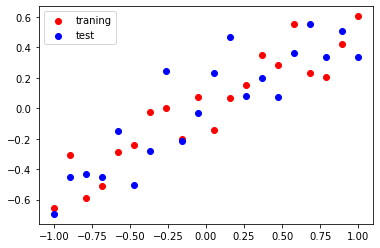

In [6]:
plt.scatter(x_train,y_train,color='r',label='traning')
plt.scatter(x_test,y_test,color = 'b',label = 'test')

plt.legend()
plt.show()

# Regression model without Dropout

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [8]:
model = Sequential()

model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='mse',metrics=['mse'])

history= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,verbose=0)


In [9]:
# evaluate the model

_,train_mse = model.evaluate(x_train,y_train,verbose=0)
_,test_mse = model.evaluate(x_test,y_test,verbose=0)

print("Train:{}, Test: {} ".format(train_mse,test_mse))

Train:0.00385635020211339, Test: 0.04626412317156792 


In [10]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 184ms/step


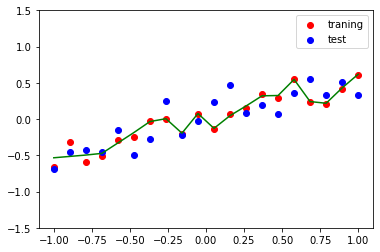

In [11]:
plt.scatter(x_train,y_train,color='r',label='traning')
plt.scatter(x_test,y_test,color = 'b',label = 'test')
plt.plot(x_test,y_pred,color='g')

plt.ylim((-1.5, 1.5))
plt.legend()
plt.show()

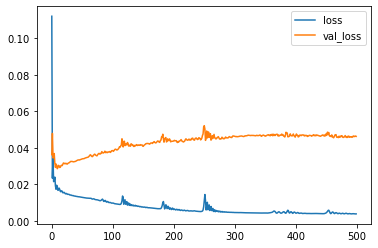

In [12]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')

plt.legend()
plt.show()

# Applying Dropout

In [24]:
model_2 = Sequential()

model_2.add(Dense(128,input_dim=1,activation="relu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='linear'))

adam = Adam(learning_rate=0.01)
model_2.compile(optimizer=adam,loss='mse',metrics=['mse'])

history_2  = model_2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,verbose=0)

In [25]:
# evaluate the model

_,train_mse = model_2.evaluate(x_train,y_train,verbose=0)
_,test_mse = model_2.evaluate(x_test,y_test,verbose=0)

print("Train:{}, Test: {} ".format(train_mse,test_mse))

Train:0.0170957762748003, Test: 0.03726855665445328 


In [26]:
y_pred_2 = model_2.predict(x_test)

1/1 [==============================] - 0s 62ms/step


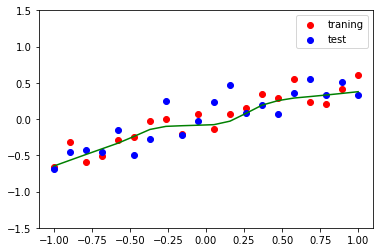

In [27]:
plt.scatter(x_train,y_train,color='r',label='traning')
plt.scatter(x_test,y_test,color = 'b',label = 'test')
plt.plot(x_test,y_pred_2,color='g')

plt.ylim((-1.5, 1.5))
plt.legend()
plt.show()

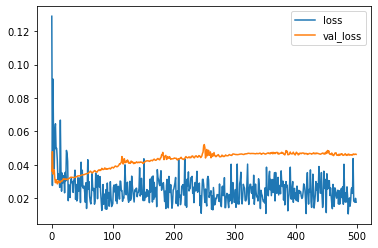

In [28]:
plt.plot(history_2.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')

plt.legend()
plt.show()